# Initialization


In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

from cb25d.track_n_groups import run_n_groups_original
from cb25d.notebook import init, savefig
from cb25d.simulation_impl_original import (
    SimulationImplOriginal,
    generate_initial_conditions,
)

init()

pygame-ce 2.5.6 (SDL 2.32.10, Python 3.13.9)


# Number of groups

## Initialization


In [2]:
p_base = Path("results/original/n_groups")

## Computation


In [3]:
def compute(k: int):
    statistics = run_n_groups_original(
        seed=0,
        create_initial_state=lambda att, ali, seed: SimulationImplOriginal(
            c_eta=0.8,
            c_gamma_ali=ali,
            c_gamma_att=att,
            c_gamma_rand=0.2,
            c_k=k,
            c_l_ali=3,
            c_tau_0=0.8,
            c_dist_critical=4*3,
            c_dist_merge=min(3, 3),
            **generate_initial_conditions(
                seed=0,
                n=100,
                l_att=3,
            ),
        ),
        runs_per_config=100,
        steps_per_run=40000 * 100,
    )
    p = p_base / f"k={k}"
    p.mkdir(parents=True, exist_ok=True)
    for em, result in statistics.items():
        np.save(p / f"{em}.npy", result)

In [ ]:
compute(k=1)

  0%|          | 0/300 [00:00<?, ?it/s]

## Plot


In [12]:
def load(k: int):
    p = p_base / f"k={k}"
    return {
        "Schooling": np.load(p / "Schooling.npy"),
        "Swarming": np.load(p / "Swarming.npy"),
        "Milling": np.load(p / "Milling.npy"),
    }

k1 = load(k=1)

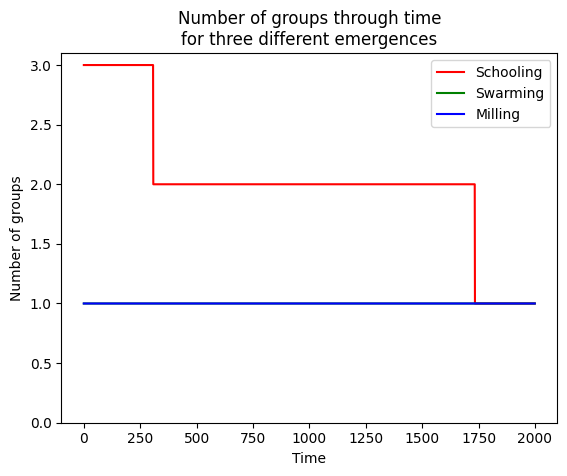

In [22]:
fig, ax = plt.subplots()

ax.plot(k1["Schooling"], label="Schooling", color="red")
ax.plot(k1["Swarming"], label="Swarming", color="green")
ax.plot(k1["Milling"], label="Milling", color="blue")

ax.set_ylim(bottom=0, top=None)
ax.set_ylabel("Number of groups")
ax.set_xlabel("Time")
ax.set_title("Number of groups through time\nfor three different emergences")
ax.legend()

savefig(fig, "fig/original/n_groups/k1.pdf")